# Advanced Backtesting: Iterative Backtesting ("event-driven") 

## A first Intuition on Iterative Backtesting (Part 1)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [5]:
data = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time")
data

,price,spread
time,,
2006-12-31 22:00:00+00:00,1.31985,0.00100
2007-01-01 22:00:00+00:00,1.32734,0.00015
2007-01-02 22:00:00+00:00,1.31688,0.00015
2007-01-03 22:00:00+00:00,1.30845,0.00015
2007-01-04 22:00:00+00:00,1.30025,0.00100
...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030
2020-06-24 21:00:00+00:00,1.12180,0.00023
2020-06-25 21:00:00+00:00,1.12184,0.00041


In [6]:
data = data.round(5)

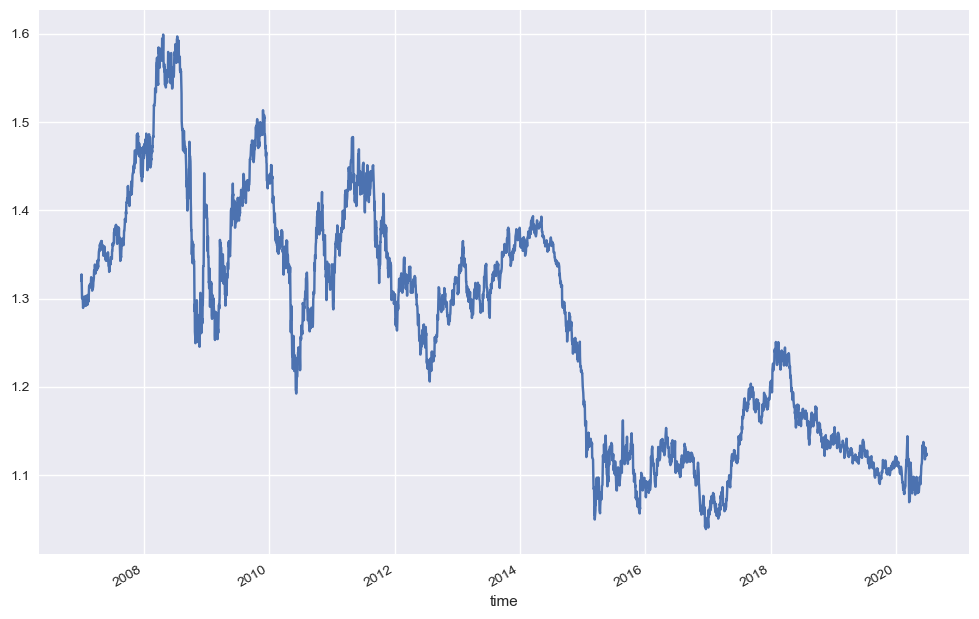

In [7]:
data.price.plot(figsize = (12, 8))
plt.show()

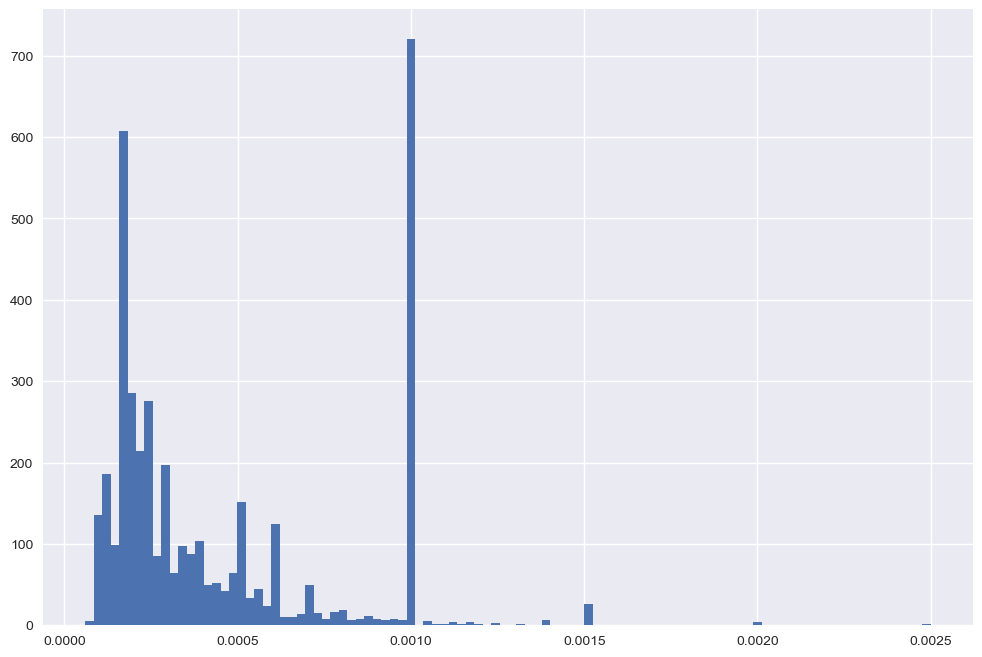

In [8]:
data.spread.hist(bins = 100, figsize = (12, 8))
plt.show()

In [9]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [10]:
for bar in range(10): # interate over the first 10 bars/candles 
    print(bar, data.index[bar].date(), data.price[bar], data.spread[bar], sep = " | ")

0 | 2006-12-31 | 1.31985 | 0.001
1 | 2007-01-01 | 1.32734 | 0.00015
2 | 2007-01-02 | 1.31688 | 0.00015
3 | 2007-01-03 | 1.30845 | 0.00015
4 | 2007-01-04 | 1.30025 | 0.001
5 | 2007-01-06 | 1.30166 | 0.001
6 | 2007-01-07 | 1.30238 | 0.00015
7 | 2007-01-08 | 1.3001 | 0.00015
8 | 2007-01-09 | 1.29379 | 0.00015
9 | 2007-01-10 | 1.28936 | 0.00015


/tmp/ipykernel_5955/1506839330.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(bar, data.index[bar].date(), data.price[bar], data.spread[bar], sep = " | ")


In [11]:
import time

In [12]:
for bar in range(10):
    print(bar, data.index[bar].date(), data.price[bar], data.spread[bar], sep = " | ")
    time.sleep(1)

0 | 2006-12-31 | 1.31985 | 0.001


/tmp/ipykernel_5955/2079494639.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(bar, data.index[bar].date(), data.price[bar], data.spread[bar], sep = " | ")


1 | 2007-01-01 | 1.32734 | 0.00015
2 | 2007-01-02 | 1.31688 | 0.00015
3 | 2007-01-03 | 1.30845 | 0.00015
4 | 2007-01-04 | 1.30025 | 0.001
5 | 2007-01-06 | 1.30166 | 0.001
6 | 2007-01-07 | 1.30238 | 0.00015
7 | 2007-01-08 | 1.3001 | 0.00015
8 | 2007-01-09 | 1.29379 | 0.00015
9 | 2007-01-10 | 1.28936 | 0.00015


## A first Intuition on Iterative Backtesting (Part 2)

In [13]:
data

,price,spread
time,,
2006-12-31 22:00:00+00:00,1.31985,0.00100
2007-01-01 22:00:00+00:00,1.32734,0.00015
2007-01-02 22:00:00+00:00,1.31688,0.00015
2007-01-03 22:00:00+00:00,1.30845,0.00015
2007-01-04 22:00:00+00:00,1.30025,0.00100
...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030
2020-06-24 21:00:00+00:00,1.12180,0.00023
2020-06-25 21:00:00+00:00,1.12184,0.00041


In [14]:
sma_s = 50
sma_l = 200

In [15]:
data["SMA_S"] = data.price.rolling(sma_s).mean()
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [16]:
data.dropna(inplace = True)

In [17]:
data

,price,spread,SMA_S,SMA_L
time,,,,
2007-08-10 21:00:00+00:00,1.36939,0.00100,1.364967,1.337644
2007-08-11 21:00:00+00:00,1.36883,0.00100,1.365587,1.337889
2007-08-12 21:00:00+00:00,1.36131,0.00012,1.365985,1.338058
2007-08-13 21:00:00+00:00,1.35331,0.00012,1.366197,1.338241
2007-08-14 21:00:00+00:00,1.34425,0.00012,1.366272,1.338420
...,...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,1.102243,1.103035
2020-06-24 21:00:00+00:00,1.12180,0.00023,1.103000,1.103129
2020-06-25 21:00:00+00:00,1.12184,0.00041,1.103689,1.103218


In [18]:
position = 0 # we start with neutral position

In [19]:
len(data)

3807

In [20]:
for bar in range(len(data)):
    if data["SMA_S"].iloc[bar] > data["SMA_L"].iloc[bar]:
        if position in [0, -1]:
            print("{}: Go Long  | Price: {} | Spread: {}".format(data.index[bar].date(), data.price[bar], data.spread[bar]))
            position = 1
    elif data["SMA_S"].iloc[bar] < data["SMA_L"].iloc[bar]:
        if position in [0, 1]:
            print("{}: Go Short | Price: {} | Spread: {}".format(data.index[bar].date(), data.price[bar], data.spread[bar]))
            position = -1

2007-08-10: Go Long  | Price: 1.36939 | Spread: 0.001
2008-08-28: Go Short | Price: 1.46735 | Spread: 0.001
2009-04-28: Go Long  | Price: 1.32745 | Spread: 0.0003
2010-01-20: Go Short | Price: 1.40842 | Spread: 0.00018
2010-09-27: Go Long  | Price: 1.35853 | Spread: 0.00018
2011-01-12: Go Short | Price: 1.33638 | Spread: 0.00025
2011-01-30: Go Long  | Price: 1.36937 | Spread: 0.00018
2011-09-10: Go Short | Price: 1.35875 | Spread: 0.001
2012-10-08: Go Long  | Price: 1.28848 | Spread: 0.00018
2013-04-15: Go Short | Price: 1.31771 | Spread: 0.00032
2013-08-04: Go Long  | Price: 1.32583 | Spread: 0.00018
2014-07-06: Go Short | Price: 1.36049 | Spread: 0.00038
2015-09-30: Go Long  | Price: 1.11942 | Spread: 0.00021
2015-11-24: Go Short | Price: 1.06244 | Spread: 0.00023
2016-03-22: Go Long  | Price: 1.11812 | Spread: 0.00018
2016-10-23: Go Short | Price: 1.08815 | Spread: 0.00017
2017-05-23: Go Long  | Price: 1.12187 | Spread: 0.0002
2018-06-06: Go Short | Price: 1.1799 | Spread: 0.0006
20

/tmp/ipykernel_5955/2733715143.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("{}: Go Long  | Price: {} | Spread: {}".format(data.index[bar].date(), data.price[bar], data.spread[bar]))
/tmp/ipykernel_5955/2733715143.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("{}: Go Short | Price: {} | Spread: {}".format(data.index[bar].date(), data.price[bar], data.spread[bar]))


## Creating an Iterative Base Class (Part 1)

In [21]:
class IterativeBase():

    def __init__(self, symbol, start, end, amount):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time").dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)

In [22]:
bc = IterativeBase("EURUSD", "2006-12-31", "2020-06-30", 100000)

In [23]:
bc.data

,price,spread,returns
time,,,
2006-12-31 22:00:00+00:00,1.31985,0.00100,NaN
2007-01-01 22:00:00+00:00,1.32734,0.00015,0.005659
2007-01-02 22:00:00+00:00,1.31688,0.00015,-0.007912
2007-01-03 22:00:00+00:00,1.30845,0.00015,-0.006422
2007-01-04 22:00:00+00:00,1.30025,0.00100,-0.006287
...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,-0.005151
2020-06-24 21:00:00+00:00,1.12180,0.00023,-0.002911
2020-06-25 21:00:00+00:00,1.12184,0.00041,0.000036


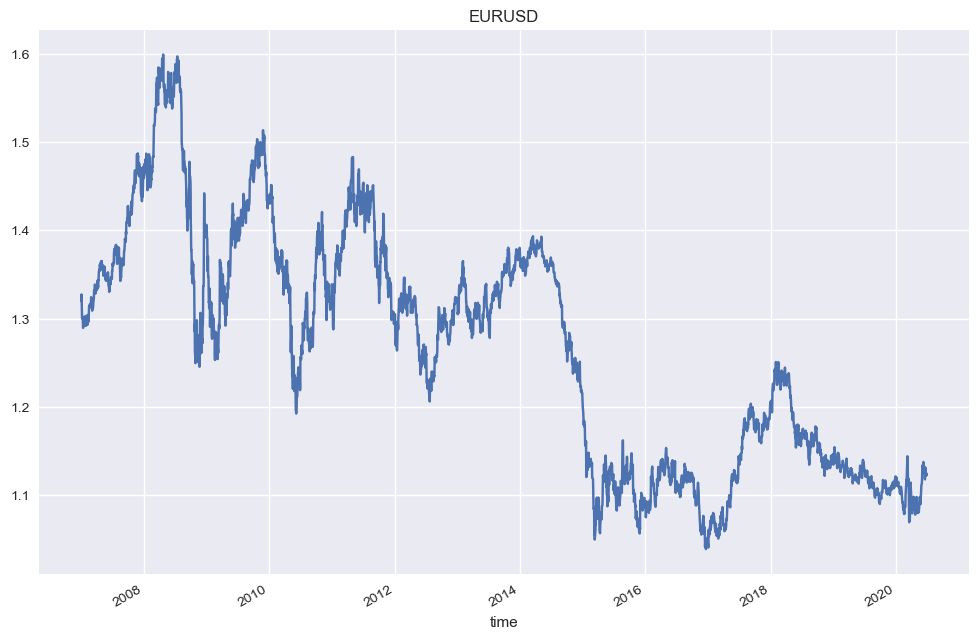

In [24]:
bc.plot_data()

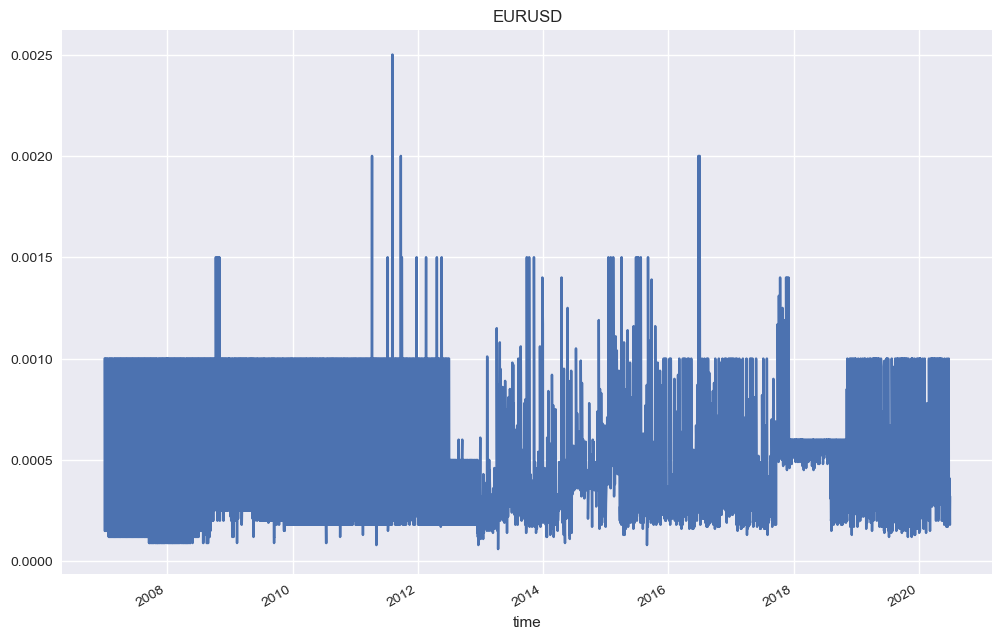

In [25]:
bc.plot_data(cols = "spread")

## Creating an Iterative Base Class (Part 2)

In [26]:
class IterativeBase():

    def __init__(self, symbol, start, end, amount):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time").dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)
    
    def get_values(self, bar):
        date = str(self.data.index[bar].date())
        price = round(self.data.price.iloc[bar], 5)
        spread = round(self.data.spread.iloc[bar], 5)
        return date, price, spread

In [27]:
bc = IterativeBase("EURUSD", "2006-12-31", "2020-06-30", 100000)

In [28]:
bc.data

,price,spread,returns
time,,,
2006-12-31 22:00:00+00:00,1.31985,0.00100,NaN
2007-01-01 22:00:00+00:00,1.32734,0.00015,0.005659
2007-01-02 22:00:00+00:00,1.31688,0.00015,-0.007912
2007-01-03 22:00:00+00:00,1.30845,0.00015,-0.006422
2007-01-04 22:00:00+00:00,1.30025,0.00100,-0.006287
...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,-0.005151
2020-06-24 21:00:00+00:00,1.12180,0.00023,-0.002911
2020-06-25 21:00:00+00:00,1.12184,0.00041,0.000036


In [29]:
bc.get_values(0)

('2006-12-31', 1.31985, 0.001)

In [30]:
bc.get_values(100)

('2007-04-22', 1.35759, 0.00012)

In [31]:
bc.get_values(-1)

('2020-06-29', 1.12331, 0.00032)

## Creating an Iterative Base Class (Part 3)

In [32]:
class IterativeBase():

    def __init__(self, symbol, start, end, amount):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time").dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)
    
    def get_values(self, bar):
        date = str(self.data.index[bar].date())
        price = round(self.data.price.iloc[bar], 5)
        spread = round(self.data.spread.iloc[bar], 5)
        return date, price, spread
    
    def print_current_balance(self, bar):
        date, price, spread = self.get_values(bar)
        print("{} | Current Balance: {}".format(date, round(self.current_balance, 2)))

In [33]:
bc = IterativeBase("EURUSD", "2006-12-31", "2020-06-30", 100000)

In [34]:
bc.data

,price,spread,returns
time,,,
2006-12-31 22:00:00+00:00,1.31985,0.00100,NaN
2007-01-01 22:00:00+00:00,1.32734,0.00015,0.005659
2007-01-02 22:00:00+00:00,1.31688,0.00015,-0.007912
2007-01-03 22:00:00+00:00,1.30845,0.00015,-0.006422
2007-01-04 22:00:00+00:00,1.30025,0.00100,-0.006287
...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,-0.005151
2020-06-24 21:00:00+00:00,1.12180,0.00023,-0.002911
2020-06-25 21:00:00+00:00,1.12184,0.00041,0.000036


In [35]:
bc.print_current_balance(0)

2006-12-31 | Current Balance: 100000


In [36]:
bc.print_current_balance(100)

2007-04-22 | Current Balance: 100000


In [37]:
bc.print_current_balance(-1)

2020-06-29 | Current Balance: 100000


## Creating an Iterative Base Class (Part 4)

In [42]:
class IterativeBase():

    def __init__(self, symbol, start, end, amount):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0 
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time").dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)
    
    def get_values(self, bar):
        date = str(self.data.index[bar].date())
        price = round(self.data.price.iloc[bar], 5)
        spread = round(self.data.spread.iloc[bar], 5)
        return date, price, spread
    
    def print_current_balance(self, bar):
        date, price, spread = self.get_values(bar)
        print("{} | Current Balance: {}".format(date, round(self.current_balance, 2)))
        
    def buy_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance -= units * price # reduce cash balance by "purchase price"
        self.units += units
        self.trades += 1
        print("{} |  Buying {} for {}".format(date, units, round(price, 5)))

In [43]:
bc = IterativeBase("EURUSD", "2006-12-31", "2020-06-30", 100000)

In [44]:
bc.print_current_balance(0)

2006-12-31 | Current Balance: 100000


In [45]:
bc.data

,price,spread,returns
time,,,
2006-12-31 22:00:00+00:00,1.31985,0.00100,NaN
2007-01-01 22:00:00+00:00,1.32734,0.00015,0.005659
2007-01-02 22:00:00+00:00,1.31688,0.00015,-0.007912
2007-01-03 22:00:00+00:00,1.30845,0.00015,-0.006422
2007-01-04 22:00:00+00:00,1.30025,0.00100,-0.006287
...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,-0.005151
2020-06-24 21:00:00+00:00,1.12180,0.00023,-0.002911
2020-06-25 21:00:00+00:00,1.12184,0.00041,0.000036


In [46]:
bc.buy_instrument(0, units = 1000)

2006-12-31 |  Buying 1000 for 1.31985


In [47]:
bc.units

1000

In [48]:
bc.print_current_balance(0)

2006-12-31 | Current Balance: 98680.15


In [49]:
100000 - 1000 * 1.31985

98680.15

In [50]:
bc.buy_instrument(1, amount = 5000)

2007-01-01 |  Buying 3766 for 1.32734


In [51]:
int(5000 / 1.32734)

3766

In [52]:
bc.print_current_balance(1)

2007-01-01 | Current Balance: 93681.39


## Creating an Iterative Base Class (Part 5)

In [56]:
class IterativeBase():

    def __init__(self, symbol, start, end, amount):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0 
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time").dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)
    
    def get_values(self, bar):
        date = str(self.data.index[bar].date())
        price = round(self.data.price.iloc[bar], 5)
        spread = round(self.data.spread.iloc[bar], 5)
        return date, price, spread
    
    def print_current_balance(self, bar):
        date, price, spread = self.get_values(bar)
        print("{} | Current Balance: {}".format(date, round(self.current_balance, 2)))
        
    def buy_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance -= units * price # reduce cash balance by "purchase price"
        self.units += units
        self.trades += 1
        print("{} |  Buying {} for {}".format(date, units, round(price, 5)))
    
    def print_current_position_value(self, bar):
        date, price, spread = self.get_values(bar)
        cpv = self.units * price
        print("{} |  Current Position Value = {}".format(date, round(cpv, 2)))
    
    def print_current_nav(self, bar):
        date, price, spread = self.get_values(bar)
        nav = self.current_balance + self.units * price
        print("{} |  Net Asset Value = {}".format(date, round(nav, 2)))

In [57]:
bc = IterativeBase("EURUSD", "2006-12-31", "2020-06-30", 100000)

In [58]:
bc.print_current_balance(0)

2006-12-31 | Current Balance: 100000


In [59]:
bc.buy_instrument(0, units = 1000)

2006-12-31 |  Buying 1000 for 1.31985


In [60]:
bc.units

1000

In [61]:
bc.print_current_balance(0)

2006-12-31 | Current Balance: 98680.15


In [62]:
bc.print_current_position_value(0)

2006-12-31 |  Current Position Value = 1319.85


In [63]:
bc.print_current_nav(0)

2006-12-31 |  Net Asset Value = 100000.0


In [64]:
bc.print_current_position_value(1)

2007-01-01 |  Current Position Value = 1327.34


In [65]:
bc.print_current_nav(1)

2007-01-01 |  Net Asset Value = 100007.49


In [66]:
bc.buy_instrument(1, amount = 5000)

2007-01-01 |  Buying 3766 for 1.32734


In [67]:
bc.print_current_balance(1)

2007-01-01 | Current Balance: 93681.39


In [68]:
bc.print_current_position_value(1)

2007-01-01 |  Current Position Value = 6326.1


In [69]:
bc.print_current_nav(1)

2007-01-01 |  Net Asset Value = 100007.49


In [70]:
bc.print_current_balance(2)

2007-01-02 | Current Balance: 93681.39


In [71]:
bc.print_current_position_value(2)

2007-01-02 |  Current Position Value = 6276.25


In [72]:
bc.print_current_nav(2)

2007-01-02 |  Net Asset Value = 99957.64


In [73]:
bc.print_current_nav(-1)

2020-06-29 |  Net Asset Value = 99035.08


In [74]:
bc.print_current_position_value(-1)

2020-06-29 |  Current Position Value = 5353.7


## Creating an Iterative Base Class (Part 6)

In [87]:
class IterativeBase():

    def __init__(self, symbol, start, end, amount):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0 
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time").dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)
    
    def get_values(self, bar):
        date = str(self.data.index[bar].date())
        price = round(self.data.price.iloc[bar], 5)
        spread = round(self.data.spread.iloc[bar], 5)
        return date, price, spread
    
    def print_current_balance(self, bar):
        date, price, spread = self.get_values(bar)
        print("{} | Current Balance: {}".format(date, round(self.current_balance, 2)))
        
    def buy_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance -= units * price # reduce cash balance by "purchase price"
        self.units += units
        self.trades += 1
        print("{} |  Buying {} for {}".format(date, units, round(price, 5)))
    
    def sell_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance += units * price # increases cash balance by "purchase price"
        self.units -= units
        self.trades += 1
        print("{} |  Selling {} for {}".format(date, units, round(price, 5)))
    
    def print_current_position_value(self, bar):
        date, price, spread = self.get_values(bar)
        cpv = self.units * price
        print("{} |  Current Position Value = {}".format(date, round(cpv, 2)))
    
    def print_current_nav(self, bar):
        date, price, spread = self.get_values(bar)
        nav = self.current_balance + self.units * price
        print("{} |  Net Asset Value = {}".format(date, round(nav, 2)))

In [88]:
bc = IterativeBase("EURUSD", "2006-12-31", "2020-06-30", 100000)

In [89]:
bc.buy_instrument(0, units = 10000) # go long 10,000 units

2006-12-31 |  Buying 10000 for 1.31985


In [90]:
bc.units

10000

In [91]:
bc.print_current_position_value(1)

2007-01-01 |  Current Position Value = 13273.4


In [92]:
bc.print_current_nav(1)

2007-01-01 |  Net Asset Value = 100074.9


In [93]:
bc.sell_instrument(1, units = 20000) # close long position and go short 10,000 units

2007-01-01 |  Selling 20000 for 1.32734


In [94]:
bc.units

-10000

In [95]:
bc.print_current_balance(1) # cash balance increased, but... 

2007-01-01 | Current Balance: 113348.3


In [96]:
bc.print_current_position_value(1) # ... the current position value is negative

2007-01-01 |  Current Position Value = -13273.4


In [97]:
bc.print_current_nav(1)

2007-01-01 |  Net Asset Value = 100074.9


## Creating an Iterative Base Class (Part 7)

In [99]:
class IterativeBase():

    def __init__(self, symbol, start, end, amount):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0 
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time").dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)
    
    def get_values(self, bar):
        date = str(self.data.index[bar].date())
        price = round(self.data.price.iloc[bar], 5)
        spread = round(self.data.spread.iloc[bar], 5)
        return date, price, spread
    
    def print_current_balance(self, bar):
        date, price, spread = self.get_values(bar)
        print("{} | Current Balance: {}".format(date, round(self.current_balance, 2)))
        
    def buy_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance -= units * price # reduce cash balance by "purchase price"
        self.units += units
        self.trades += 1
        print("{} |  Buying {} for {}".format(date, units, round(price, 5)))
    
    def sell_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance += units * price # increases cash balance by "purchase price"
        self.units -= units
        self.trades += 1
        print("{} |  Selling {} for {}".format(date, units, round(price, 5)))
    
    def print_current_position_value(self, bar):
        date, price, spread = self.get_values(bar)
        cpv = self.units * price
        print("{} |  Current Position Value = {}".format(date, round(cpv, 2)))
    
    def print_current_nav(self, bar):
        date, price, spread = self.get_values(bar)
        nav = self.current_balance + self.units * price
        print("{} |  Net Asset Value = {}".format(date, round(nav, 2)))
        
    def close_pos(self, bar):
        date, price, spread = self.get_values(bar)
        print(75 * "-")
        print("{} | +++ CLOSING FINAL POSITION +++".format(date))
        self.current_balance += self.units * price # closing final position (works with short and long!)
        print("{} | closing position of {} for {}".format(date, self.units, price))
        self.units = 0 # setting position to neutral
        self.trades += 1
        perf = (self.current_balance - self.initial_balance) / self.initial_balance * 100
        self.print_current_balance(bar)
        print("{} | net performance (%) = {}".format(date, round(perf, 2) ))
        print("{} | number of trades executed = {}".format(date, self.trades))
        print(75 * "-")

In [100]:
bc = IterativeBase("EURUSD", "2006-12-31", "2020-06-30", 100000)

In [101]:
bc.buy_instrument(0, amount = 100000)

2006-12-31 |  Buying 75766 for 1.31985


In [102]:
bc.print_current_balance(0)

2006-12-31 | Current Balance: 0.24


In [103]:
bc.print_current_position_value(0)

2006-12-31 |  Current Position Value = 99999.76


In [104]:
bc.print_current_balance(-1)

2020-06-29 | Current Balance: 0.24


In [105]:
bc.print_current_position_value(-1)

2020-06-29 |  Current Position Value = 85108.71


In [106]:
bc.print_current_nav(-1)

2020-06-29 |  Net Asset Value = 85108.95


In [107]:
bc.close_pos(-1)

---------------------------------------------------------------------------
2020-06-29 | +++ CLOSING FINAL POSITION +++
2020-06-29 | closing position of 75766 for 1.12331
2020-06-29 | Current Balance: 85108.95
2020-06-29 | net performance (%) = -14.89
2020-06-29 | number of trades executed = 2
---------------------------------------------------------------------------


In [108]:
bc.data

,price,spread,returns
time,,,
2006-12-31 22:00:00+00:00,1.31985,0.00100,NaN
2007-01-01 22:00:00+00:00,1.32734,0.00015,0.005659
2007-01-02 22:00:00+00:00,1.31688,0.00015,-0.007912
2007-01-03 22:00:00+00:00,1.30845,0.00015,-0.006422
2007-01-04 22:00:00+00:00,1.30025,0.00100,-0.006287
...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,-0.005151
2020-06-24 21:00:00+00:00,1.12180,0.00023,-0.002911
2020-06-25 21:00:00+00:00,1.12184,0.00041,0.000036


In [109]:
bc.data.price[-1] / bc.data.price[0] - 1

/tmp/ipykernel_5955/3677939590.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bc.data.price[-1] / bc.data.price[0] - 1


-0.1489108610826988

## Creating an Iterative Base Class (Part 8)

In [111]:
class IterativeBase():

    def __init__(self, symbol, start, end, amount, use_spread = True):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0
        self.use_spread = use_spread
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time").dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)
    
    def get_values(self, bar):
        date = str(self.data.index[bar].date())
        price = round(self.data.price.iloc[bar], 5)
        spread = round(self.data.spread.iloc[bar], 5)
        return date, price, spread
    
    def print_current_balance(self, bar):
        date, price, spread = self.get_values(bar)
        print("{} | Current Balance: {}".format(date, round(self.current_balance, 2)))
        
    def buy_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if self.use_spread:
            price += spread/2 # ask price
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance -= units * price # reduce cash balance by "purchase price"
        self.units += units
        self.trades += 1
        print("{} |  Buying {} for {}".format(date, units, round(price, 5)))
    
    def sell_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if self.use_spread:
            price -= spread/2 # bid price
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance += units * price # increases cash balance by "purchase price"
        self.units -= units
        self.trades += 1
        print("{} |  Selling {} for {}".format(date, units, round(price, 5)))
    
    def print_current_position_value(self, bar):
        date, price, spread = self.get_values(bar)
        cpv = self.units * price
        print("{} |  Current Position Value = {}".format(date, round(cpv, 2)))
    
    def print_current_nav(self, bar):
        date, price, spread = self.get_values(bar)
        nav = self.current_balance + self.units * price
        print("{} |  Net Asset Value = {}".format(date, round(nav, 2)))
        
    def close_pos(self, bar):
        date, price, spread = self.get_values(bar)
        print(75 * "-")
        print("{} | +++ CLOSING FINAL POSITION +++".format(date))
        self.current_balance += self.units * price # closing final position (works with short and long!)
        self.current_balance -= (abs(self.units) * spread/2 * self.use_spread) # substract half-spread costs
        print("{} | closing position of {} for {}".format(date, self.units, price))
        self.units = 0 # setting position to neutral
        self.trades += 1
        perf = (self.current_balance - self.initial_balance) / self.initial_balance * 100
        self.print_current_balance(bar)
        print("{} | net performance (%) = {}".format(date, round(perf, 2) ))
        print("{} | number of trades executed = {}".format(date, self.trades))
        print(75 * "-")

In [112]:
bc = IterativeBase("EURUSD", "2006-12-31", "2020-06-30", 100000, use_spread = True)

In [113]:
bc.buy_instrument(0, amount = 100000)

2006-12-31 |  Buying 75737 for 1.32035


In [114]:
bc.print_current_nav(0)

2006-12-31 |  Net Asset Value = 99962.13


In [115]:
bc.data

,price,spread,returns
time,,,
2006-12-31 22:00:00+00:00,1.31985,0.00100,NaN
2007-01-01 22:00:00+00:00,1.32734,0.00015,0.005659
2007-01-02 22:00:00+00:00,1.31688,0.00015,-0.007912
2007-01-03 22:00:00+00:00,1.30845,0.00015,-0.006422
2007-01-04 22:00:00+00:00,1.30025,0.00100,-0.006287
...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,-0.005151
2020-06-24 21:00:00+00:00,1.12180,0.00023,-0.002911
2020-06-25 21:00:00+00:00,1.12184,0.00041,0.000036


In [116]:
bc.data.spread[0] / 2 * 75737

/tmp/ipykernel_5955/3952459002.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bc.data.spread[0] / 2 * 75737


37.8685

In [117]:
bc.close_pos(-1)

---------------------------------------------------------------------------
2020-06-29 | +++ CLOSING FINAL POSITION +++
2020-06-29 | closing position of 75737 for 1.12331
2020-06-29 | Current Balance: 85064.66
2020-06-29 | net performance (%) = -14.94
2020-06-29 | number of trades executed = 2
---------------------------------------------------------------------------


## Iterative Backtesting of SMA Strategies

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [120]:
class IterativeBase():

    def __init__(self, symbol, start, end, amount, use_spread = True):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0
        self.position = 0
        self.use_spread = use_spread
        self.get_data()

    def get_data(self):
        raw = pd.read_csv("detailed.csv", parse_dates = ["time"], index_col = "time").dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw.price / raw.price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)
    
    def get_values(self, bar):
        date = str(self.data.index[bar].date())
        price = round(self.data.price.iloc[bar], 5)
        spread = round(self.data.spread.iloc[bar], 5)
        return date, price, spread
    
    def print_current_balance(self, bar):
        date, price, spread = self.get_values(bar)
        print("{} | Current Balance: {}".format(date, round(self.current_balance, 2)))
        
    def buy_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if self.use_spread:
            price += spread/2 # ask price
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance -= units * price # reduce cash balance by "purchase price"
        self.units += units
        self.trades += 1
        print("{} |  Buying {} for {}".format(date, units, round(price, 5)))
    
    def sell_instrument(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if self.use_spread:
            price -= spread/2 # bid price
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance += units * price # increases cash balance by "purchase price"
        self.units -= units
        self.trades += 1
        print("{} |  Selling {} for {}".format(date, units, round(price, 5)))
    
    def print_current_position_value(self, bar):
        date, price, spread = self.get_values(bar)
        cpv = self.units * price
        print("{} |  Current Position Value = {}".format(date, round(cpv, 2)))
    
    def print_current_nav(self, bar):
        date, price, spread = self.get_values(bar)
        nav = self.current_balance + self.units * price
        print("{} |  Net Asset Value = {}".format(date, round(nav, 2)))
        
    def close_pos(self, bar):
        date, price, spread = self.get_values(bar)
        print(75 * "-")
        print("{} | +++ CLOSING FINAL POSITION +++".format(date))
        self.current_balance += self.units * price # closing final position (works with short and long!)
        self.current_balance -= (abs(self.units) * spread/2 * self.use_spread) # substract half-spread costs
        print("{} | closing position of {} for {}".format(date, self.units, price))
        self.units = 0 # setting position to neutral
        self.trades += 1
        perf = (self.current_balance - self.initial_balance) / self.initial_balance * 100
        self.print_current_balance(bar)
        print("{} | net performance (%) = {}".format(date, round(perf, 2) ))
        print("{} | number of trades executed = {}".format(date, self.trades))
        print(75 * "-")

In [121]:
class IterativeBacktest(IterativeBase):

    # helper method
    def go_long(self, bar, units = None, amount = None):
        if self.position == -1:
            self.buy_instrument(bar, units = -self.units) # if short position, go neutral first
        if units:
            self.buy_instrument(bar, units = units)
        elif amount:
            if amount == "all":
                amount = self.current_balance
            self.buy_instrument(bar, amount = amount) # go long

    # helper method
    def go_short(self, bar, units = None, amount = None):
        if self.position == 1:
            self.sell_instrument(bar, units = self.units) # if long position, go neutral first
        if units:
            self.sell_instrument(bar, units = units)
        elif amount:
            if amount == "all":
                amount = self.current_balance
            self.sell_instrument(bar, amount = amount) # go short

    def test_sma_strategy(self, SMA_S, SMA_L):
        
        # nice printout
        stm = "Testing SMA strategy | {} | SMA_S = {} & SMA_L = {}".format(self.symbol, SMA_S, SMA_L)
        print("-" * 75)
        print(stm)
        print("-" * 75)
        
        # reset 
        self.position = 0  # initial neutral position
        self.trades = 0  # no trades yet
        self.current_balance = self.initial_balance  # reset initial capital
        self.get_data() # reset dataset
        
        # prepare data
        self.data["SMA_S"] = self.data["price"].rolling(SMA_S).mean()
        self.data["SMA_L"] = self.data["price"].rolling(SMA_L).mean()
        self.data.dropna(inplace = True)

        # sma crossover strategy
        for bar in range(len(self.data)-1): # all bars (except the last bar)
            if self.data["SMA_S"].iloc[bar] > self.data["SMA_L"].iloc[bar]: # signal to go long
                if self.position in [0, -1]:
                    self.go_long(bar, amount = "all") # go long with full amount
                    self.position = 1  # long position
            elif self.data["SMA_S"].iloc[bar] < self.data["SMA_L"].iloc[bar]: # signal to go short
                if self.position in [0, 1]:
                    self.go_short(bar, amount = "all") # go short with full amount
                    self.position = -1 # short position
        self.close_pos(bar+1) # close position at the last bar

In [122]:
bc = IterativeBacktest("EURUSD", "2006-12-31", "2020-06-30", 100000, use_spread= True)

In [123]:
bc.data

,price,spread,returns
time,,,
2006-12-31 22:00:00+00:00,1.31985,0.00100,NaN
2007-01-01 22:00:00+00:00,1.32734,0.00015,0.005659
2007-01-02 22:00:00+00:00,1.31688,0.00015,-0.007912
2007-01-03 22:00:00+00:00,1.30845,0.00015,-0.006422
2007-01-04 22:00:00+00:00,1.30025,0.00100,-0.006287
...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,-0.005151
2020-06-24 21:00:00+00:00,1.12180,0.00023,-0.002911
2020-06-25 21:00:00+00:00,1.12184,0.00041,0.000036


In [124]:
bc.test_sma_strategy(50, 200)

---------------------------------------------------------------------------
Testing SMA strategy | EURUSD | SMA_S = 50 & SMA_L = 200
---------------------------------------------------------------------------
2007-08-10 |  Buying 72998 for 1.36989
2008-08-28 |  Selling 72998 for 1.46685
2008-08-28 |  Selling 72998 for 1.46685
2009-04-28 |  Buying 72998 for 1.3276
2009-04-28 |  Buying 88311 for 1.3276
2010-01-20 |  Selling 88311 for 1.40833
2010-01-20 |  Selling 88311 for 1.40833
2010-09-27 |  Buying 88311 for 1.35862
2010-09-27 |  Buying 94774 for 1.35862
2011-01-12 |  Selling 94774 for 1.33626
2011-01-12 |  Selling 94774 for 1.33626
2011-01-30 |  Buying 94774 for 1.36946
2011-01-30 |  Buying 90178 for 1.36946
2011-09-10 |  Selling 90178 for 1.35825
2011-09-10 |  Selling 90178 for 1.35825
2012-10-08 |  Buying 90178 for 1.28857
2012-10-08 |  Buying 99931 for 1.28857
2013-04-15 |  Selling 99931 for 1.31755
2013-04-15 |  Selling 99931 for 1.31755
2013-08-04 |  Buying 99931 for 1.32592
201

## Using Modules and adding Docstrings

In [125]:
import IterativeBacktest as IB

In [126]:
bc = IB.IterativeBacktest("EURUSD", "2006-12-31", "2020-06-30", 100000, use_spread = True)

In [127]:
bc.data

,price,spread,returns
time,,,
2006-12-31 22:00:00+00:00,1.31985,0.00100,NaN
2007-01-01 22:00:00+00:00,1.32734,0.00015,0.005659
2007-01-02 22:00:00+00:00,1.31688,0.00015,-0.007912
2007-01-03 22:00:00+00:00,1.30845,0.00015,-0.006422
2007-01-04 22:00:00+00:00,1.30025,0.00100,-0.006287
...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,-0.005151
2020-06-24 21:00:00+00:00,1.12180,0.00023,-0.002911
2020-06-25 21:00:00+00:00,1.12184,0.00041,0.000036


In [128]:
bc.test_sma_strategy(50, 200)

---------------------------------------------------------------------------
Testing SMA strategy | EURUSD | SMA_S = 50 & SMA_L = 200
---------------------------------------------------------------------------
2007-08-10 |  Buying 72998 for 1.36989
2008-08-28 |  Selling 72998 for 1.46685
2008-08-28 |  Selling 72998 for 1.46685
2009-04-28 |  Buying 72998 for 1.3276
2009-04-28 |  Buying 88311 for 1.3276
2010-01-20 |  Selling 88311 for 1.40833
2010-01-20 |  Selling 88311 for 1.40833
2010-09-27 |  Buying 88311 for 1.35862
2010-09-27 |  Buying 94774 for 1.35862
2011-01-12 |  Selling 94774 for 1.33626
2011-01-12 |  Selling 94774 for 1.33626
2011-01-30 |  Buying 94774 for 1.36946
2011-01-30 |  Buying 90178 for 1.36946
2011-09-10 |  Selling 90178 for 1.35825
2011-09-10 |  Selling 90178 for 1.35825
2012-10-08 |  Buying 90178 for 1.28857
2012-10-08 |  Buying 99931 for 1.28857
2013-04-15 |  Selling 99931 for 1.31755
2013-04-15 |  Selling 99931 for 1.31755
2013-08-04 |  Buying 99931 for 1.32592
201

## Adding Contrarian and Bollinger Strategy to the Framework

In [129]:
import IterativeBacktest as IB

In [130]:
bc = IB.IterativeBacktest("EURUSD", "2006-12-31", "2020-06-30", 100000, use_spread= True)

In [131]:
bc.data

,price,spread,returns
time,,,
2006-12-31 22:00:00+00:00,1.31985,0.00100,NaN
2007-01-01 22:00:00+00:00,1.32734,0.00015,0.005659
2007-01-02 22:00:00+00:00,1.31688,0.00015,-0.007912
2007-01-03 22:00:00+00:00,1.30845,0.00015,-0.006422
2007-01-04 22:00:00+00:00,1.30025,0.00100,-0.006287
...,...,...,...
2020-06-23 21:00:00+00:00,1.12507,0.00030,-0.005151
2020-06-24 21:00:00+00:00,1.12180,0.00023,-0.002911
2020-06-25 21:00:00+00:00,1.12184,0.00041,0.000036


__Contrarian__

In [132]:
bc.test_con_strategy(window = 3)

---------------------------------------------------------------------------
Testing Contrarian strategy | EURUSD | Window = 3
---------------------------------------------------------------------------
2007-01-03 |  Buying 76421 for 1.30852
2007-01-14 |  Selling 76421 for 1.29364
2007-01-14 |  Selling 76421 for 1.29364
2007-01-15 |  Buying 76421 for 1.29185
2007-01-15 |  Buying 76634 for 1.29185
2007-01-16 |  Selling 76634 for 1.29372
2007-01-16 |  Selling 76634 for 1.29372
2007-01-21 |  Buying 76634 for 1.29507
2007-01-21 |  Buying 76476 for 1.29507
2007-01-22 |  Selling 76476 for 1.30258
2007-01-22 |  Selling 76476 for 1.30258
2007-01-24 |  Buying 76476 for 1.29328
2007-01-24 |  Buying 77575 for 1.29328
2007-01-28 |  Selling 77575 for 1.29561
2007-01-28 |  Selling 77575 for 1.29561
2007-02-01 |  Buying 77575 for 1.29666
2007-02-01 |  Buying 77449 for 1.29666
2007-02-05 |  Selling 77449 for 1.29841
2007-02-05 |  Selling 77449 for 1.29841
2007-02-09 |  Buying 77449 for 1.30135
2007-02-

__Bollinger__

In [133]:
bc.test_boll_strategy(50, 2)

---------------------------------------------------------------------------
Testing Bollinger Bands Strategy | EURUSD | SMA = 50 & dev = 2
---------------------------------------------------------------------------
2007-02-26 |  Selling 75519 for 1.32416
2007-05-16 |  Buying 75519 for 1.34947
2007-06-07 |  Buying 73318 for 1.33784
2007-06-28 |  Selling 73318 for 1.3536
2007-07-01 |  Selling 72850 for 1.36229
2007-08-12 |  Buying 72850 for 1.36137
2007-09-17 |  Selling 71022 for 1.3983
2007-12-13 |  Buying 71022 for 1.44347
2008-02-25 |  Selling 64180 for 1.49738
2008-04-25 |  Buying 64180 for 1.5632
2008-07-01 |  Selling 57852 for 1.58817
2008-07-23 |  Buying 57852 for 1.56784
2008-08-06 |  Buying 60717 for 1.5326
2008-09-21 |  Selling 60717 for 1.47754
2008-10-01 |  Buying 64905 for 1.38221
2008-11-24 |  Selling 64905 for 1.30635
2008-12-10 |  Selling 63508 for 1.33508
2009-01-11 |  Buying 63508 for 1.33632
2009-03-17 |  Selling 62877 for 1.3472
2009-04-16 |  Buying 62877 for 1.30497
